___
# <center>***1. Descripción del problema***</center>
___

## ***1.1 Objetivo:***

## <center>***```Diabetes, Hypertension and Stroke Prediction```***</center>

Predecir enfermedades del sistema circulatorio (Diabetes, hipertensión y Accidentes Cerebrovasculares) en base factores relacionados con el estilo de vida de la población.

## ***1.2 Descripción:***

### **Selección del tema y motivación:**
De acuerdo a un informe semanal de defunciones publicado por ***Departamento de Estadísticas e Información de Salud, DEIS*** del Ministerio de Salud de Chile el 7 de abril de 2022. Nos muestra una variedad de causas por las cuales han fallecido ultimamente los chilenos.  

En esta publicación, durante los años 2020, 2021 y 2022 la mayor causalidad de muertes es producto de enfermedades del sistema circulatorio, con 21.5% de la totalidad de causas.

Dado estos antecedentes, nos interesa conocer cuáles son precursores asociados a enfermedades relacionadas con el sistema circulatorio.

Es por ello que hemos decidido utilizar una base de datos del año 2015 en la cual la agencia estadounidense CDC (Centers for Disease Control and Prevention) tabulan datos relacionados a ***Diabetes, Hipertensión y Accidentes Cerebrovasculares*** como referencia.

## <center>Causas de muerte en Estados Unidos 2020</center>
<center><img src=https://i.postimg.cc/xdxmsMFX/Causas-de-muerte-EEUU.jpg width="640" height="480" ></center>

## <center>Causas de muerte en Chile </center>
<center><img src=https://i.postimg.cc/PxRBCfpg/Causa-de-muertes-Chile.jpg width="640" height="480"></center>  

## ***1.3 Planificación de la investigación:***

* ¿Qué factores nos ayudan a predecir estas enfermedades?
* ***Hipótesis:***
    >>> *"Tener un estilo de vida saludable, disminuye la probabilidad de padecer enfermedades cardiovasculares."*
* Definición de Vector objetivo:
    * ***```Diabetes```***
    * ***```Hipertensión```***
    * ***```Acciedentes Cerebrovasculares```***    
* Estrategias analíticas :
    * Variables continuas serán analizadas mediante representaciones histográficas.
    * Variables discretas serán analizadas mediante gráficas de barra.
    * Análisis econométrico de las variables independientes.
    * Análisis de correlaciones con las variables objetivos.
    * Análisis de existencia de valores perdidos.
    * Análisis de existencia de valores nulos.
* Conceptos relevantes para el desarrollo de la investigación:
    * ¿Qué datos serán transformados?:  
     Se realizará un escalamiento de los datos que se encuentren en una escala distinta al resto de las variables.
    * No se ultizarán técnicas de imputación, debido a que no existen valores nulos o perdidos.
    * Análisis exploratorios:
        * Los datos en su gran mayoría son numéricos, pero de carácter discreto (booleanos).
        * Los vectores objetivos son binarios.
    * Modelación: Realizaremos una modelación de clasificación del tipo supervisada, esto debido a que las tres variables objetivo son binarias y se encuentran etiquetadas con Clase 0 y Clase 1, además, como estrategia para realizar la modelación desciptiva y predictiva, utilizaremos las variables con **mayor correlación**. Los modelos e hiperparámetros a buscar son los siguientes:

        | Modelo | Grilla de parámetros |
        | ---      | ---            |
        | GradientBoosting    | model__learning_rate': np.linspace(0, 1, 11), model__max_features': ['auto','sqrt','log2']|
        | Randomforest    | 'model__n_estimators': [10,50,100,150,200,250], 'model__max_depth':[None, 5, 8, 10], 'model__max_features': ['sqrt', None]    |
        | AdaBoost | 'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1]|
        | Regresión logística    | 'model__C': [0.001, 0.01, 0.1, 1, 10], 'model__penalty':['l1', 'l2']|

    * Métrica:
        * Accuracy
        * Curva ROC
    * La distribución de la data será de un 70% para entrenamiento y un 30% para validación, con un random state = 42 en caso de ser necesario.

___
# <center>***2. Aspectos Computacionales***</center>
___

Sección donde se entregará a detalle las librerías a utilizar, preprocesamiento de variables y grilla tentativa de modelos con sus hiperparámetros a buscar.

## **2.1    Librerías**

In [1]:
%matplotlib inline

# Ingesta de datos

import pandas as pd

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo

# Funciones de utilidades

import utility as ut

# Procesamiento de datos

import numpy as np
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

# Modelación

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# Evaluación
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, roc_auc_score

# Serialización

from joblib import dump, load


# Ignoramos warnings de funciones
warnings.filterwarnings('ignore')

# Establecemos estilo de gráficos
plt.rcParams['figure.figsize'] = (8, 6)

# Ingesta de datos
df = pd.read_csv('health_data.csv')

## **2.2 Inspección de los datos**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

In [3]:
ut.cat_num_rate_analysis(df)

,len of unique,len of data,col type,unique of col
BMI,80,70692,float64,"[26.0, 28.0, 29.0, 18.0, 31.0, 32.0, 27.0, 24.0, 21.0, 58.0, 30.0, 20.0, 22.0, 38.0, 40.0, 25.0, 36.0, 47.0, 19.0, 37.0, 41.0, 23.0, 34.0, 35.0, 4..."
PhysHlth,31,70692,float64,"[30.0, 0.0, 10.0, 3.0, 6.0, 4.0, 15.0, 1.0, 2.0, 14.0, 7.0, 25.0, 21.0, 20.0, 5.0, 8.0, 22.0, 23.0, 29.0, 12.0, 18.0, 28.0, 26.0, 24.0, 27.0, 11.0..."
MentHlth,31,70692,float64,"[5.0, 0.0, 7.0, 3.0, 4.0, 2.0, 30.0, 20.0, 1.0, 15.0, 10.0, 25.0, 14.0, 28.0, 6.0, 29.0, 26.0, 12.0, 16.0, 22.0, 13.0, 8.0, 9.0, 21.0, 18.0, 17.0,..."
Age,13,70692,float64,"[4.0, 12.0, 13.0, 11.0, 8.0, 1.0, 6.0, 3.0, 7.0, 10.0, 9.0, 5.0, 2.0]"
GenHlth,5,70692,float64,"[3.0, 1.0, 2.0, 4.0, 5.0]"
HvyAlcoholConsump,2,70692,float64,"[0.0, 1.0]"
Hypertension,2,70692,float64,"[1.0, 0.0]"
Diabetes,2,70692,float64,"[0.0, 1.0]"
DiffWalk,2,70692,float64,"[0.0, 1.0]"
Veggies,2,70692,float64,"[1.0, 0.0]"


In [4]:
ut.check_nulls(df)

,Cantidad nulos
Age,Sin nulos
Sex,Sin nulos
HighChol,Sin nulos
CholCheck,Sin nulos
BMI,Sin nulos
Smoker,Sin nulos
HeartDiseaseorAttack,Sin nulos
PhysActivity,Sin nulos
Fruits,Sin nulos
Veggies,Sin nulos


##### **```Comentarios:```**
* Nuestro Dataset contiene un total de 70692 filas y 18 columnas.
* Todos los falores ingresados corresponden a valores tipo float, pudiendo encontrarnos con variables del tipo continuas y categóricas.
* Existen 4 variables Continuas: ```Age, BMI, MentHlth, PhysHlth```
* Existen 11 variables Categóricas: ```Sex, HighChol, CholCheck, Smoker, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, GenHlth, DiffWalk```.
* Ninguna columna contiene datos nulos.

## **2.2 Descripción de las variables del Dataset**

| ```Variable```               | ```Descripción```    |  
|:-----------------------|:---------------|  
| 'Age'                  | Categoría de edad de 13 niveles (_AGEG5YR consulte el libro de códigos) 1 = 18-24, 9 = 60-64, 13 = 80 o más       |  
| 'Sex'                  | 0 = female, 1 = male       |  
| 'HighChol'             | 0 = no high cholesterol, 1 = high cholesterol       |  
| 'CholCheck'            | 0 = sin control de colesterol en 5 años, 1 = si control de colesterol en 5 años       |  
| 'BMI'                  | Índice de masa corporal       |  
| 'Smoker'               | ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos] 0 = no, 1 = si       |  
| 'HeartDiseaseorAttack' | Enfermedad coronaria (CHD) o infarto de miocardio (MI) 0 = no, 1 = si       |  
| 'PhysActivity'         | Actividad física en los últimos 30 días - sin incluir el trabajo 0 = no, 1 = si       |  
| 'Fruits'               | Consume Fruta 1 o más veces al día 0 = no, 1 = si       |  
| 'Veggies'              | Consume Vegetables 1 o más veces al día 0 = no, 1 = si      |  
| 'HvyAlcoholConsump'    | Varón adulto: más de 14 tragos por semana. Mujer adulta: más de 7 bebidas por semana. 0 = no, 1 = si       |  
| 'GenHlth'              | Diría usted que en general su salud es: (escala 1-5) 1 = excelente, 2 = muy buena, 3 = buena, 4 = regular, 5 = mala      |
| 'MentHlth'             | Días de mala salud mental escala 1-30 días      |
| 'PhysHlth'             | Días de enfermedad o lesión física en los últimos 30 días escala 1-30       |
| 'DiffWalk'             | ¿Tiene serias dificultades para caminar o subir escaleras? 0 = no, 1 = sí       |
| 'Diabetes'             | 0 = no diabetes, 1 = diabetes      |
| 'Hypertension'         | 0 = no hypertension, 1 = hypertension       |
| 'Strokeanger'          | 0 = no, 1 = yes     |

### Detalle de Clasificación variable Age

| Valor | Descripción        |  
|:-----:|:-------------------|  
| 1     | Entre 18 y 24 años |
| 2     | Entre 25 y 29 años |
| 3     | Entre 30 y 34 años |
| 4     | Entre 35 y 39 años |
| 5     | Entre 40 y 44 años |
| 6     | Entre 45 y 49 años |
| 7     | Entre 50 y 54 años |
| 8     | Entre 55 y 59 años |
| 9     | Entre 60 y 64 años |
| 10    | Entre 65 y 69 años |
| 11    | Entre 70 y 74 años |
| 12    | Entre 75 y 79 años |
| 13    | 80 años o más      |

### Tabla de indice de masa corporal (BMI)

| BMI   | Clasificación      |  
|:-----:|:-------------------|  
| < 18.5         | Bajo peso |
| 18,5 - 25      | Adecuado  |
| 25,0 - 30      | Sobrepeso |
| 30,0 - 35      | Obesidad Grado I |
| 35,0 - 40      | Obesidad Grado II |
| 40 <       | Obesidad Grado III |

## **2.3 Detalles de ingeniería de atributos**


Debido a que el Dataset no contiene datos nulos y todos son numéricos del tipo float, solo se realizará un preprocesamiento al momento de modelar, en el cual experimentaremos con la escala de las variables continuas y un preprocesamiento en una copia del Dataset para realizar gráficos exploratorios.

In [5]:
# Copiamos dataset original

df_exp = df.copy()

In [6]:
# Aplicamos función que otorga categorías al BMI(índice de masa corporal):

df_exp['BMI_CAT'] = df['BMI'].apply(func=ut.imc_to_cat)

In [7]:
# Aplicamos función que otorga categorías a la edad:

df_exp['Age_cat'] = df['Age'].apply(func=ut.age_to_cat)

## **2.4 Grilla de modelos e Hiperparámetros**


#### Modelos sin escalamiento de las variables continuas

In [8]:
random_state = 42

dict_modelos = {     
    'Random_Forest':(RandomForestClassifier(random_state=random_state, n_jobs=-1), {
        'n_estimators': [200, 300, 350, 400],
        'max_depth':[8, 10, 11, 12],
        'max_features': ['sqrt', None] 
    }),
   'Gradient_Boosting_Classifier':(GradientBoostingClassifier(random_state=random_state), {
        'learning_rate': np.linspace(0, 1, 11),
        'max_features': ['auto','sqrt','log2']
    }),
    'AdaBoost':(AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1, n_estimators=5), random_state=42, n_estimators=100, learning_rate=1),{
            'n_estimators': [10, 50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5, 1]
     }),
    'LR': (LogisticRegression(random_state=random_state, n_jobs=-1), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty':['l1', 'l2']
    })
}

#### Modelos con escalamiento de las variables continuas

In [9]:
random_state = 42

dict_modelos_esc = {     
    'Random_Forest':(RandomForestClassifier(random_state=random_state, n_jobs=-1), {
        'model__n_estimators': [200, 300, 350, 400],
        'model__max_depth':[8, 10, 11, 12],
        'model__max_features': ['sqrt', None] 
    }),
   'Gradient_Boosting_Classifier':(GradientBoostingClassifier(random_state=random_state), {
        'model__learning_rate': np.linspace(0, 1, 11),
        'model__max_features': ['auto','sqrt','log2']
    }),
    'AdaBoost':(AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1, n_estimators=5), random_state=42, n_estimators=100, learning_rate=1),{
            'model__n_estimators': [10, 50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.5, 1]
     }),
    'LR': (LogisticRegression(random_state=random_state, n_jobs=-1), {
        'model__C': [0.001, 0.01, 0.1, 1, 10],
        'model__penalty':['l1', 'l2']
    })
}

___
# <center>***3. Análisis Exploratorio***</center>
___

## **3.1 Exploración Datos Perdidos y Nulos**



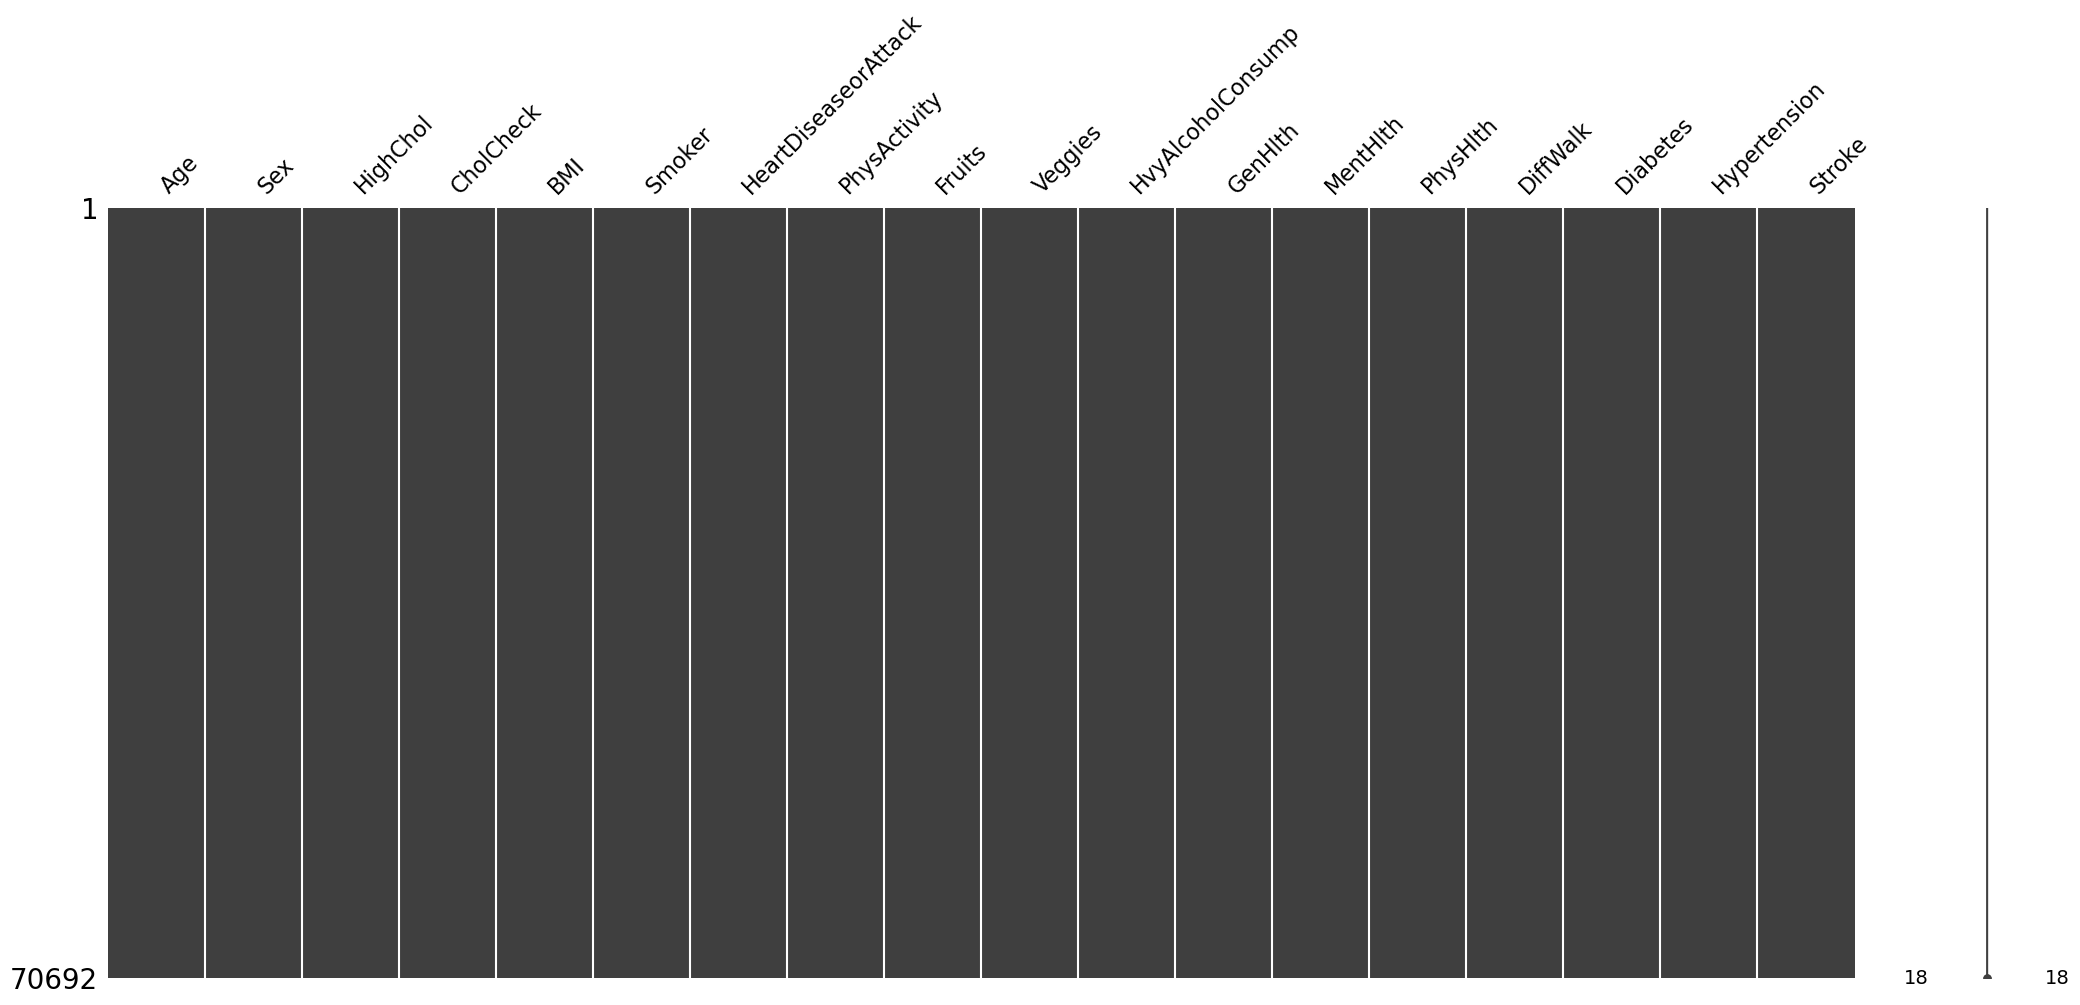

In [10]:
msngo.matrix(df)
plt.show()

##### **```Comentarios:```**
* No se identifican datos nulos en el dataset, por lo que no se necesita eliminar ni aplicar técnicas de imputación para trabajar los datos.

## **3.2 Análisis de Correlaciones con Variables Objetivo**

### **3.2.1 Correlaciones con Variable Diabetes**

In [11]:
list_corr_diabetes = ut.corr_vector(df, 'Diabetes', 0.2)

                      Diabetes
Diabetes              1.000000
GenHlth               0.407612
Hypertension          0.381516
BMI                   0.293373
HighChol              0.289213
Age                   0.278738
DiffWalk              0.272646
PhysHlth              0.213081
HeartDiseaseorAttack  0.211523


### **3.2.2 Correlaciones con Variable Hypertension**

In [12]:
list_corr_hypertension = ut.corr_vector(df, 'Hypertension', 0.2)

                      Hypertension
Hypertension              1.000000
Diabetes                  0.381516
Age                       0.338132
GenHlth                   0.320540
HighChol                  0.316515
BMI                       0.241019
DiffWalk                  0.234784
HeartDiseaseorAttack      0.210750


### **3.2.3 Correlaciones con Variable Stroke**

In [13]:
list_corr_stroke = ut.corr_vector(df, 'Stroke', 0.1)

                        Stroke
Stroke                1.000000
HeartDiseaseorAttack  0.223394
DiffWalk              0.192266
GenHlth               0.189447
PhysHlth              0.164488
Hypertension          0.129060
Diabetes              0.125427
Age                   0.123879


##### **```Comentarios:```**
* Las correlaciones para las 3 variables son bastante bajas, por los que no debiésemos presenciar efectos de multicolinealidad.

## **3.3 Análisis Variables Continuas**

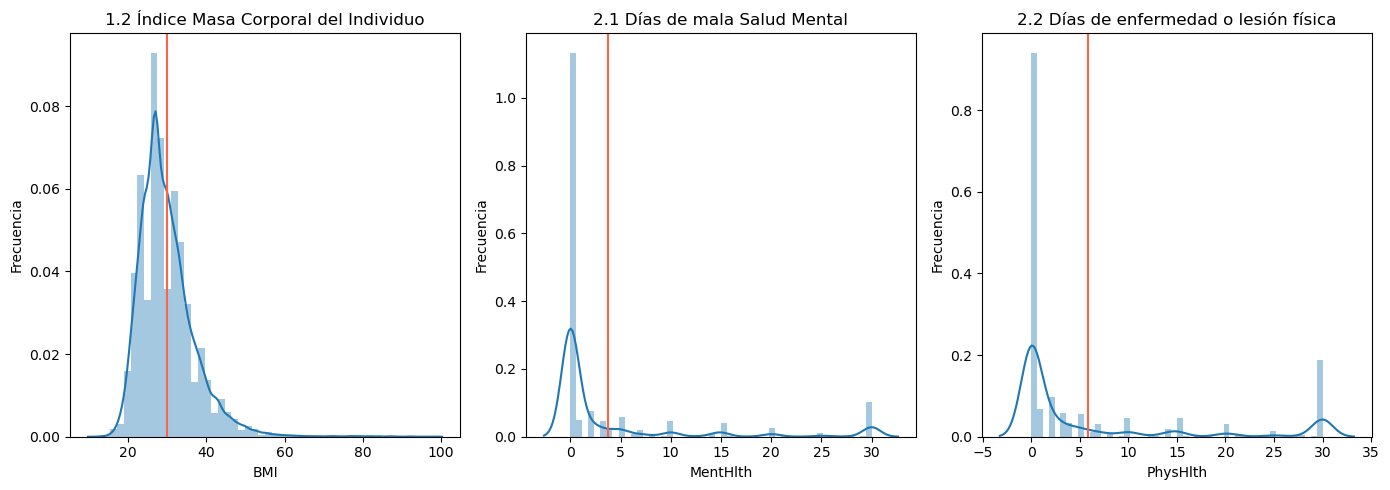

In [14]:
hist_dict = {    
    'BMI': '1.2 Índice Masa Corporal del Individuo',
    'MentHlth': '2.1 Días de mala Salud Mental',
    'PhysHlth': '2.2 Días de enfermedad o lesión física'
}

ut.plot_hist(df, hist_dict)

##### **```Comentarios:```**

- **Gráfico 1.2:** *'Índice de masa corporal del individuo'*, del gráfico se pueden deducir que esta variable contiene outliners, es decir, se encuentran datos alejados de la media en frecuencia baja. Alcanza máximo de 98, dado los grados de obesidad presentes en EEUU se considera valor aceptable. La mayoría de los individuos presentan índice de masa corporal entre 25 y 33, es decir, la mayoría de los individuos se encuentran entre la normalidad y la obesidad. Se observa una distribución asimétrica de los datos.

- **Gráfico 2.1:** *'Días de mala Salud Mental'*, escala de 1 a 30 días. Se observa que alrededor del 50% de los individuos muestreados tienen 0 días de mala salud mental. El promedio es igual a 3,75 días. Posee desviación estándar alta debido a la distribución de los datos.

- **Gráfico 2.2:** *'Días de enfermedad o lesión física'*, al igual que el gráfico anterior escala de 1 a 30 días. Posee media igual a 5,81 días con alta desviación estándar, es decir, la distribución de los datos es heterogénea por lo que se observan outliners.

## **Gráficos Boxplots**

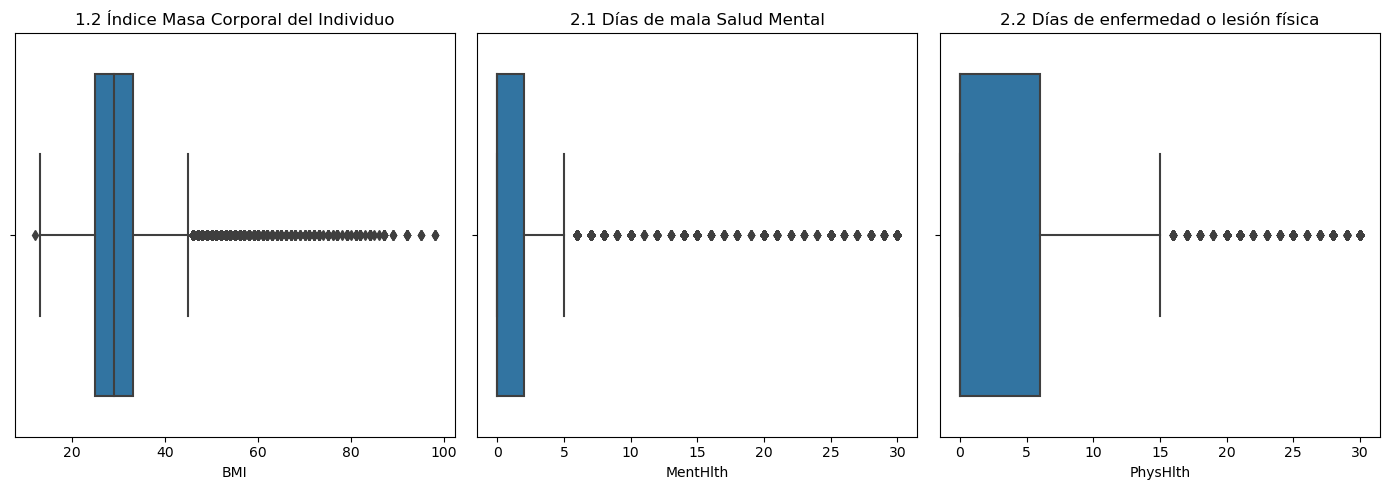

In [15]:
ut.plot_box(df, hist_dict)

##### **```Comentarios:```**

Mediante los Boxplot podemos observar con más detalles los Outliers, obteniendo la siguiente información:

* BMI, MentHlth y PhysHlth son los que presentan una mayor cantidad de outliers, siendo BMI la variable con una mayor concentración de estos.

* Las tres variables anteriormente mencionadas están sesgadas hacia valores bajos. 

## **3.4 Análisis Variables Discretas**

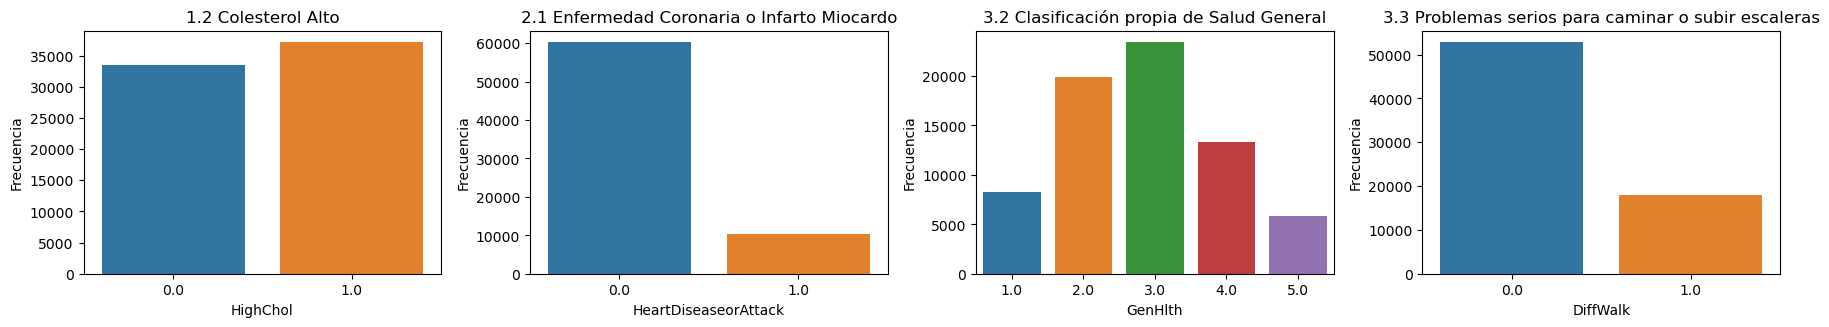

In [16]:
bar_dict = {    
    'HighChol': '1.2 Colesterol Alto',        
    'HeartDiseaseorAttack': '2.1 Enfermedad Coronaria o Infarto Miocardo',    
    'GenHlth': '3.2 Clasificación propia de Salud General',
    'DiffWalk': '3.3 Problemas serios para caminar o subir escaleras'    
}

ut.plot_bar(df, bar_dict)

##### **```Comentarios:```**

- **Gráfico 1.2:** *'Colesterol alto'*, variable binaria. 37.163 individuos presentan colesterol alto dentro de la muestra, más de la mitad del dataset.

- **Gráfico 2.1:** *'Enfermedad coronaria o infarto al miocardio'* 60.243 de los individuos no han sufrido enfermedades coronarias ni infartos al miocardio.

- **Gráfico 3.2:** *'Clasificación propia de salud general'* se clasifica desde 1 como excelente a 5 como mala. Las primeras 3 categorías representan buena salud en general, lo que representa 73% aproximadamente de la muestra.

- **Gráfico 3.3:** *'Problemas serios para caminar o subir escaleras'* se observa que la mayoría no presenta problemas de movilidad, solo 20% admite problemas al caminar o subir escaleras.

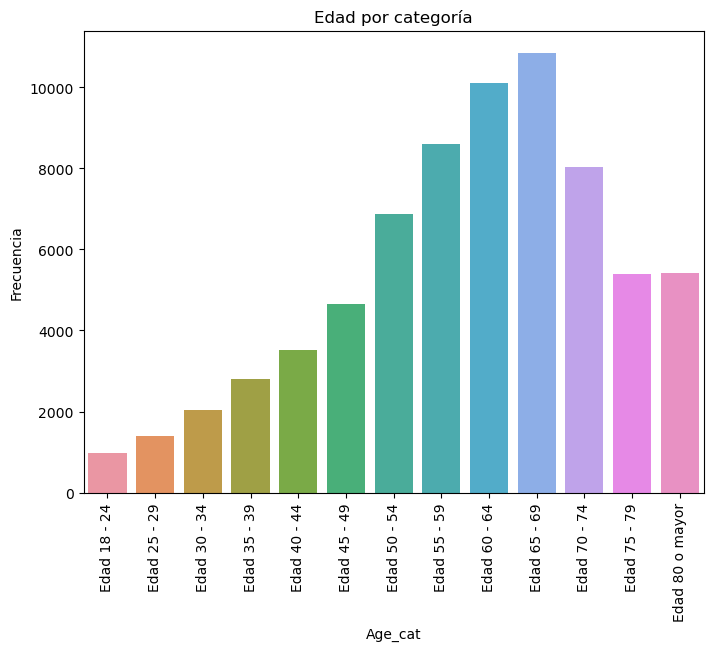

In [17]:
_, list_order = ut.age_cat()
sns.countplot(data=df_exp, x='Age_cat', order=list_order)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Edad por categoría');

##### **```Comentarios:```**

* La mayoria de los individuos se encuentra entre los 50 y los 74 años de edad.

___
# <center>***4. Variable Obetivo: Diabetes***</center>
___

## **4.1 Exploración Variable Objetivo Diabetes**

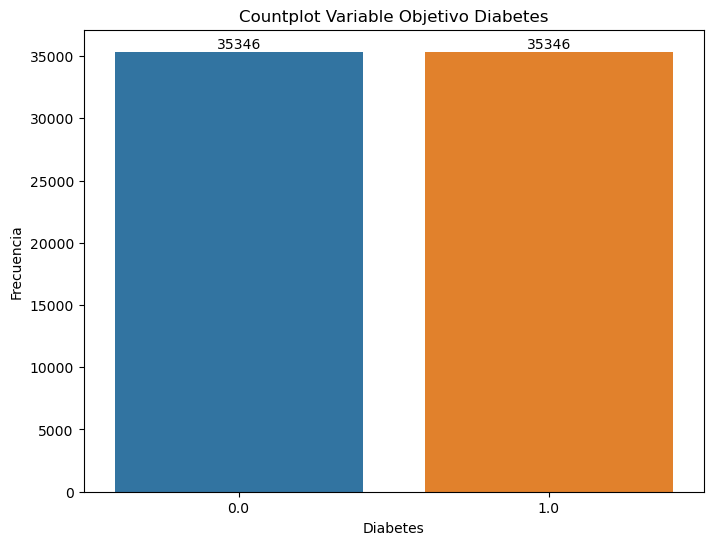

In [18]:
ut.countplot_graph(df, 'Diabetes')

##### **```Comentarios:```**
* Se observa que la variable diabetes se encuentra balanceada, 50% de la muestra tiene diabetes y la otra mitad esta sana. Al encontrarse balanceada se puede trabajar con el accuracy para determinar efectividad del modelo.

## **4.2 Análisis Variables Independientes con Variable Objetivo Diabetes  [Crossplot]**

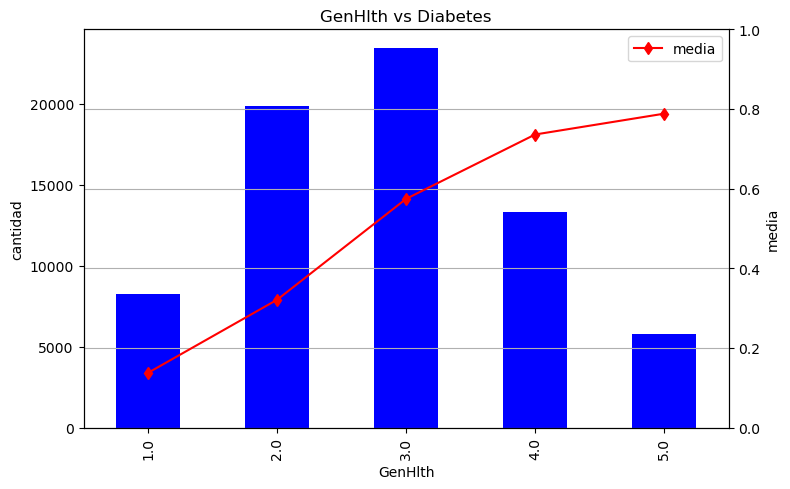

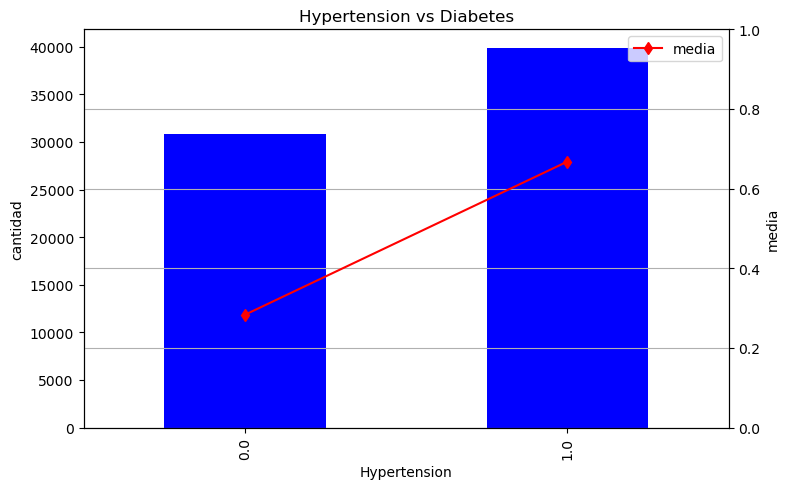

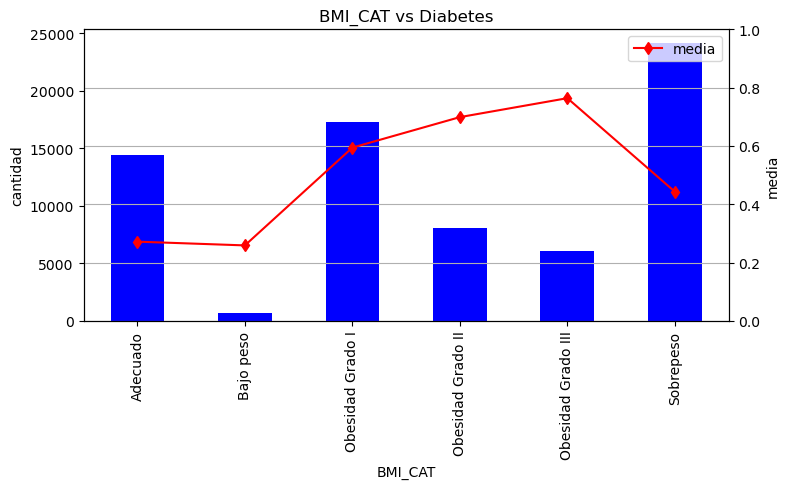

In [19]:
ut.crossplot(df_exp, ['GenHlth', 'Hypertension', 'BMI_CAT'], 'Diabetes', xlim=None)

##### **```Comentarios:```**

**Gráfico GenHlth vs Diabetes:**

En el grupo 3 se observa que se tiene una percepción errónea de su salud, ya que el grupo se categoriza como ‘Buena salud’, pero la probabilidad de Diabetes es alta. El resto de los grupos coinciden con su percepción.

**Gráfico Hipertensión vs Diabetes:**

Se observa que el grupo con Hipertensión (1) coincide con alta incidencia de Diabetes, lo que es común para estas enfermedades ya que se encuentran relacionadas.

**Gráfico BMI vs Diabetes:**

Personas con mayor grado de obesidad son las que tienen mayor probabilidad de tener diabetes, a medida que aumenta la masa corporal la probabilidad de padecer esta enfermedad aumenta.

## **4.3 Exploración Econométrica Variable Diabetes**

In [20]:
modelo_descriptivo_diabetes = ut.model_logit(df, 'Diabetes', list_corr_diabetes)

Optimization terminated successfully.
         Current function value: 0.519172
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70683
Method:                           MLE   Df Model:                            8
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.2510
Time:                        15:58:58   Log-Likelihood:                -36701.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.2591      0.067    -93.087      0.000      -6.391      -6.127

##### **```Comentarios:```**

Con los coeficientes podemos simular casos utilizando la función invlogit, la cuál devuelve el inverso y entrega la probabilidad de que ocurra la Clase.

En el siguiente caso, simularemos una persona con el BMI promedio, el cuál sería 28 y con una edad de la categoría 8, la cual corresponde a la media igualmente, en este caso tendría entre 55 y 59 años.

Las demás carácteristicas a simular serían:

* Salud general: 5 (Muy mala).

* Hypertension: Sí.

* BMI(Índice Masa Corporal): 35.

* Colesterol alto: Sí.

* Edad: Entre 55 y 59 años.

* Dificultad para caminar: Sí.

* Días de enfermedad o daño físico en los últimos días: 10.

* Cardiopatía coronaria (CHD) o Miocardio: Sí.

In [21]:
intercept = -6.2591
Genhlth = 0.6208
hypertension = 0.7629
bmi = 0.0769
highcol = 0.5872
age = 0.1629
diffwalk = 0.1563
physh = -0.0087
heartda = 0.3265

res = intercept + Genhlth + hypertension + bmi*35 + highcol + age*8 + diffwalk + physh*10 + heartda

print(f'Resultado: {ut.invlogit(res)*100:.2f}%')

Resultado: 52.56%


Un individuo con estas características tendría una probabilidad del 52% de tener Diabetes.

##### **```Comentarios:```**

Con la función coef_prob_logit obtenemos como cada coeficiente afecta en la probabilidad de que ocurra la Clase 1, la cual indica Diabetes.

In [22]:
# Con la función coef_prob_logit podemos observar en cuanto aumenta o disminuye aproximadamente cada coeficiente del modelo descriptivo.

ut.coef_prob_logit(modelo_descriptivo_diabetes.params)

Variable const disminuye en -156.48% aproximadamente la probabilidad de tener diabetes
Variable GenHlth aumenta en 15.52% aproximadamente la probabilidad de tener diabetes
Variable Hypertension aumenta en 19.07% aproximadamente la probabilidad de tener diabetes
Variable BMI aumenta en 1.92% aproximadamente la probabilidad de tener diabetes
Variable HighChol aumenta en 14.68% aproximadamente la probabilidad de tener diabetes
Variable Age aumenta en 4.07% aproximadamente la probabilidad de tener diabetes
Variable DiffWalk aumenta en 3.91% aproximadamente la probabilidad de tener diabetes
Variable PhysHlth disminuye en -0.22% aproximadamente la probabilidad de tener diabetes
Variable HeartDiseaseorAttack aumenta en 8.16% aproximadamente la probabilidad de tener diabetes


* Podemos observar que la variable Hypertension es la que mayor aumenta la probabilidad de que ocurra la Clase 1. Esto podría ser debido a que la mayoría de las personas con una Diabetes avanzada cuenta con hipertensión, por lo que estaría afectando en la probabilidad de que ocurra la Clase 1 (Diabetes)

* Otro coeficiente a destacar es BMI(Índice de Masa Corporal) ya que BMI es una variable continua y actualmente está afectando en un 1.92% la probabilidad de que ocurra la Clase 1. Por lo tanto, contar con un BMI alto, implicaría en un mayor riesgo de tener diabetes.

## **4.4 Entrenamiento de Modelos**

In [23]:
metricas_diabetes, modelos_diabetes, X_test_diabetes, y_test_diabetes = ut.train_model(df, 'Diabetes', list_corr_diabetes, dict_modelos, random_state)

In [24]:
metricas_diabetes_escalado, modelos_diabetes_escalado, X_test_diabetes_escalado, y_test_diabetes_escalado = ut.train_model(df, 'Diabetes', list_corr_diabetes, dict_modelos_esc, random_state, scalar = True, scalar_variables=['BMI', 'PhysHlth', 'Age'])

## **4.5 Métricas de Desempeño y Resultados**

#### Modelos sin escalamiento de las variables continuas

In [25]:
metricas_diabetes.sort_values(by='accuracy_validacion', ascending=False)

,best_params,accuracy_validacion,accuracy_train,auc_score
Gradient_Boosting_Classifier,"{'learning_rate': 0.1, 'max_features': 'log2'}",0.7516,0.7485,0.8270
Random_Forest,"{'max_depth': 8, 'max_features': 'sqrt', 'n_es...",0.7497,0.7541,0.8243
AdaBoost,"{'learning_rate': 0.5, 'n_estimators': 50}",0.7485,0.7454,0.8241
LR,"{'C': 1, 'penalty': 'l2'}",0.7460,0.7442,0.8203


#### Modelos con escalamiento de las variables continuas

In [26]:
metricas_diabetes_escalado.sort_values(by='accuracy_validacion', ascending=False)

,best_params,accuracy_validacion,accuracy_train,auc_score
Gradient_Boosting_Classifier,"{'model__learning_rate': 0.1, 'model__max_feat...",0.7516,0.7485,0.8270
Random_Forest,"{'model__max_depth': 8, 'model__max_features':...",0.7496,0.7541,0.8243
AdaBoost,"{'model__learning_rate': 0.5, 'model__n_estima...",0.7485,0.7454,0.8241
LR,"{'model__C': 10, 'model__penalty': 'l2'}",0.7460,0.7442,0.8203


**Comentarios:**

Casi todos los modelos presentan resultados similares, pero al parecer el **AdaBoost no escalado** es el más cercano al óptimo, por lo tanto, lo elegiremos como mejor modelo

In [27]:
modelo_ada_diabetes = modelos_diabetes['AdaBoost']

In [28]:
print(classification_report(y_test_diabetes, modelo_ada_diabetes.predict(X_test_diabetes)))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.78      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



**Comentarios:**

Del reporte de clasificaciones podemos obtener lo siguiente:

* Precision, recall y f1-score de ambas clases están balanceadas.

* En cuanto a accuracy, nuestro modelo es un 15% superior que un clasificador aleatorio con un 75%.

## **4.6 Curva ROC**

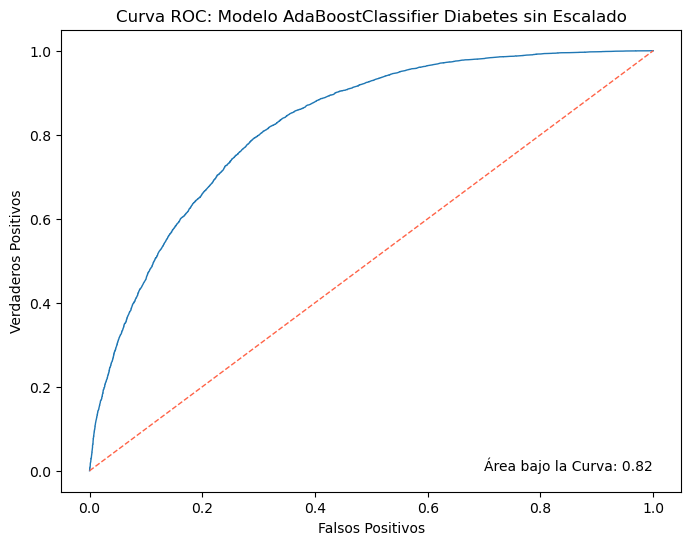

In [29]:
ut.plot_roc_curve(X_test_diabetes, y_test_diabetes, modelo_ada_diabetes.best_estimator_,  'Curva ROC: Modelo AdaBoostClassifier Diabetes sin Escalado', 0.82)

**Comentarios:**

Con el gráfico de la Curva ROC podemos observar que cuando estemos capturando el 40% de positivos, nuestro modelo estará capturando aproximadamente un 85% de verdaderos positivos

## **4.7 Serialización**

In [30]:
dump(modelo_ada_diabetes.best_estimator_, 'modelo-diabetes.sav')

['lcj_modelo-diabetes.sav']

___
# <center>***5. Variable Obetivo: Hipertensión***</center>
___

## **5.1 Exploración Variable Objetivo Hipertensión**



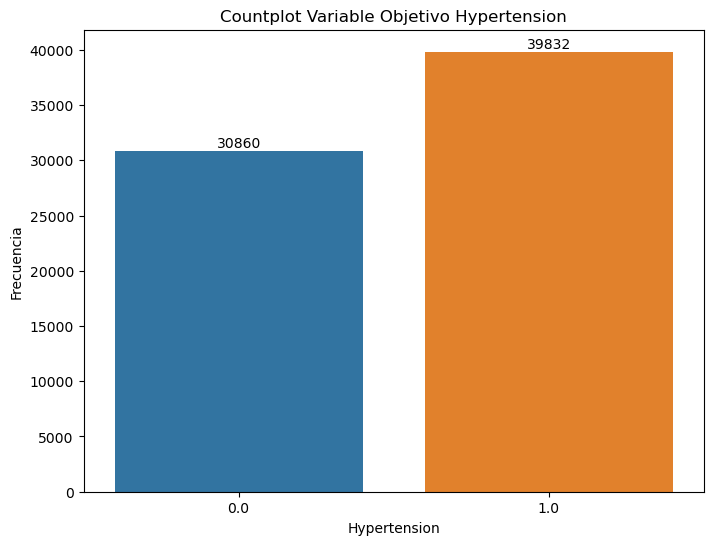

In [31]:
ut.countplot_graph(df, 'Hypertension')

##### **```Comentarios:```**
* Se observa que la mayoría de la muestra tiene hipertensión, pero aún así la variable se encuentra balanceada.

## **5.2 Análisis Variables Independientes con Variable Objetivo Hipertensión  [Crossplot]**

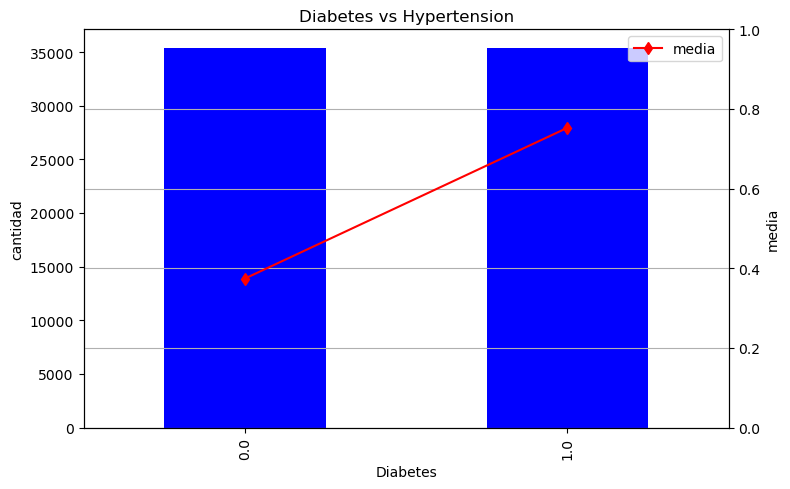

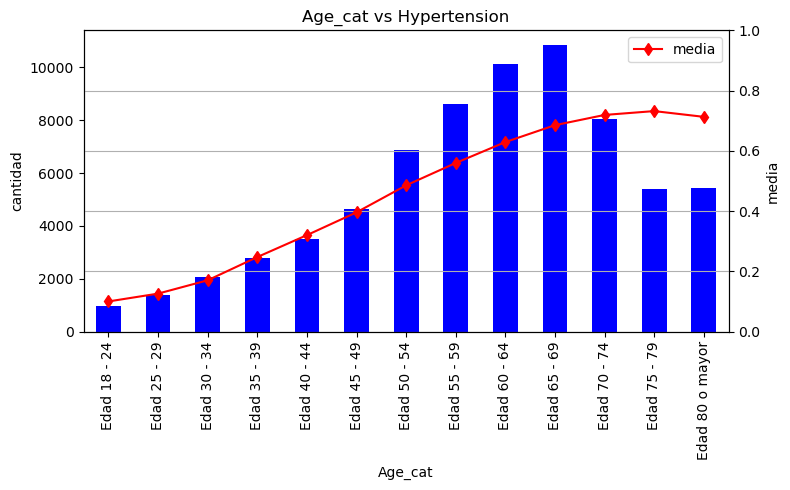

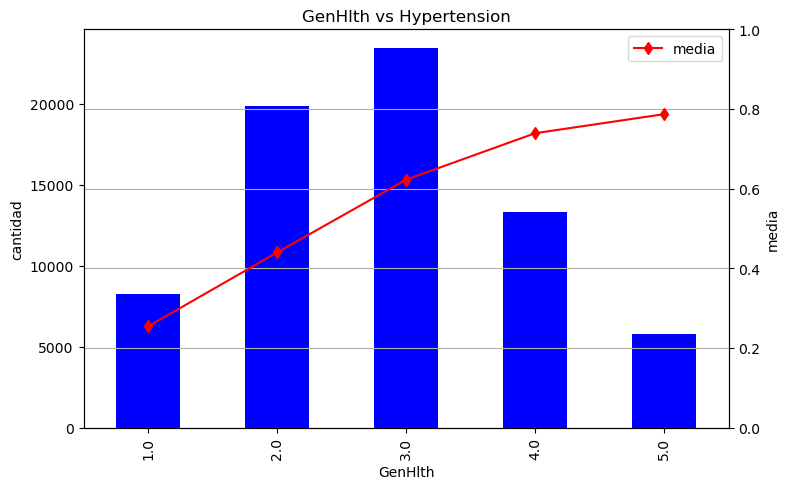

In [32]:
ut.crossplot(df_exp, ['Diabetes','Age_cat','GenHlth'], 'Hypertension', xlim=None)

##### **```Comentarios:```**

**Gráfico Diabetes vs Hipertensión:**

Los porcentajes de personas con y sin diabetes son similares, dentro de ellas, las personas con Diabetes tienen mayor probabilidad de presentar hipertensión que las hipertensas de presentar Diabetes.


**Gráfico Edad vs Hipertensión:**

Grupos con mayor probabilidad de hipertensión son los grupos con mayor edad, de los 55 años en adelante.


**Gráfico GenHlth vs Hipertensión:**

Coincide que el grupo 5, quienes consideran no tener buena salud con alta probabilidad de Hipertensión. El grupo 3, quienes consideran tener una ‘Buena salud’, presenta altas probabilidades de padecer hipertensión, puede deberse a que no hayan realizados chequeos acordes.

## **5.3 Exploración Econométrica Variable Hipertensión**

In [33]:
modelo_descriptivo_hypertension = ut.model_logit(df, 'Hypertension', list_corr_hypertension)

Optimization terminated successfully.
         Current function value: 0.529536
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Hypertension   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70684
Method:                           MLE   Df Model:                            7
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.2270
Time:                        16:07:41   Log-Likelihood:                -37434.
converged:                       True   LL-Null:                       -48429.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.9763      0.063    -79.312      0.000      -5.099      -4.853

**Comentarios:**

Con la variable objetivo Hypertension simularemos un individuo con las siguientes características:

* Diabetes: Si.

* Age: 40-44.

* Gen(Salud general): 2 (Buena).

* Colesterol Alto: No.

* BMI(Índice de Masa Corporal): 25.

* Diffwalk(Dificultad para caminar o subir escaleras): No.

* HeartDA(Cardiopatía coronaria (CHD) o Miocardio): No.

In [34]:
intercept = -4.9763
diabetes = 0.7536
age = 0.2127
gen = 0.2871
highc = 0.7681
bmi = 0.0596
diffwalk = 0.1130
heartda = 0.4588

res = intercept + diabetes + age*5 + gen + bmi*25

print(f'Resultado: {ut.invlogit(res)*100:.2f}%')

Resultado: 20.07%


Los resultados nos indican que una persona con estas características tiene un 20% de probabilidad de tener Hipertensión.

Revisemos como afecta cada variable en la probabilidad de que una persona tenga Hipertensión:

In [35]:
ut.coef_prob_logit(modelo_descriptivo_hypertension.params)

Variable const disminuye en -124.41% aproximadamente la probabilidad de tener diabetes
Variable Diabetes aumenta en 18.84% aproximadamente la probabilidad de tener diabetes
Variable Age aumenta en 5.32% aproximadamente la probabilidad de tener diabetes
Variable GenHlth aumenta en 7.18% aproximadamente la probabilidad de tener diabetes
Variable HighChol aumenta en 19.20% aproximadamente la probabilidad de tener diabetes
Variable BMI aumenta en 1.49% aproximadamente la probabilidad de tener diabetes
Variable DiffWalk aumenta en 2.83% aproximadamente la probabilidad de tener diabetes
Variable HeartDiseaseorAttack aumenta en 11.47% aproximadamente la probabilidad de tener diabetes


**Comentarios:**

* Diabetes junto con el Colesterol alto(HighChol) estarían afectando mayormente en la probabilidad de que ocurra la Clase 1(Hipertensión).

* BMI estaría afectando en gran parte la probabilidad de que ocurra la Clase 1, al igual que en el modelo descriptivo de Diabetes, por lo tanto, podemos decir que el BMI es un factor a considerar dentro de estas enfermedades.

* Otra variable que afecta de forma relevante la Hipertensión son las enfermedades de cardiopatía coronaria o miocardio.

## **5.4 Entrenamiento de Modelos**

In [36]:
metricas_hypertension, modelos_hypertension, X_test_hypertension, y_test_hypertension = ut.train_model(df, 'Hypertension', list_corr_hypertension, dict_modelos, random_state)

In [37]:
metricas_hypertension_escalado, modelos_hypertension_escalado, X_test_hypertension_escalado, y_test_hypertension_escalado = ut.train_model(df, 'Hypertension', list_corr_diabetes, dict_modelos_esc, random_state, scalar = True, scalar_variables=['BMI', 'Age'])


## **5.5 Métricas de Desempeño y Resultados**

#### Modelos sin escalamiento de las variables continuas

In [38]:
metricas_hypertension_escalado.sort_values(by='accuracy_validacion', ascending=False)

,best_params,accuracy_validacion,accuracy_train,auc_score
AdaBoost,"{'model__learning_rate': 1, 'model__n_estimato...",0.7395,0.7452,0.8041
Random_Forest,"{'model__max_depth': 10, 'model__max_features'...",0.7391,0.7632,0.8037
LR,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.7390,0.7445,0.8016
Gradient_Boosting_Classifier,"{'model__learning_rate': 0.2, 'model__max_feat...",0.7389,0.7487,0.8059


#### Modelos con escalamiento de las variables continuas

In [39]:
metricas_hypertension.sort_values(by='accuracy_validacion', ascending=False)

,best_params,accuracy_validacion,accuracy_train,auc_score
Gradient_Boosting_Classifier,"{'learning_rate': 0.1, 'max_features': 'auto'}",0.7407,0.7479,0.8059
Random_Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.7397,0.7604,0.8029
LR,"{'C': 0.01, 'penalty': 'l2'}",0.7393,0.7446,0.8014
AdaBoost,"{'learning_rate': 0.5, 'n_estimators': 200}",0.7384,0.7449,0.8040


**Comentarios:**

Al igual que en los modelos de Diabetes, los modelos presentan resultados similares, en este caso nos quedaremos con **Gradient Boosting escalado**, ya que presenta el mejor accuracy de validación y está cercano al óptimo.

In [40]:
modelo_gb_hypertension = modelos_hypertension_escalado['Gradient_Boosting_Classifier']

In [41]:
print(classification_report(y_test_hypertension_escalado, modelo_gb_hypertension.predict(X_test_hypertension_escalado)))

              precision    recall  f1-score   support

         0.0       0.74      0.62      0.68      9266
         1.0       0.74      0.83      0.78     11942

    accuracy                           0.74     21208
   macro avg       0.74      0.73      0.73     21208
weighted avg       0.74      0.74      0.74     21208



**Comentarios:**

Del reporte de clasificaciones podemos obtener lo siguiente:

* Precision, recall y f1-score de ambas clases están balanceadas.

* Recall de la Clase 1 es bastante bueno, podemos decir que esta clase se está prediciendo con mayor verdad.

* En cuanto a accuracy, nuestro modelo es un 14% superior que un clasificador aleatorio con un 74%.

## **5.6 Curva ROC**

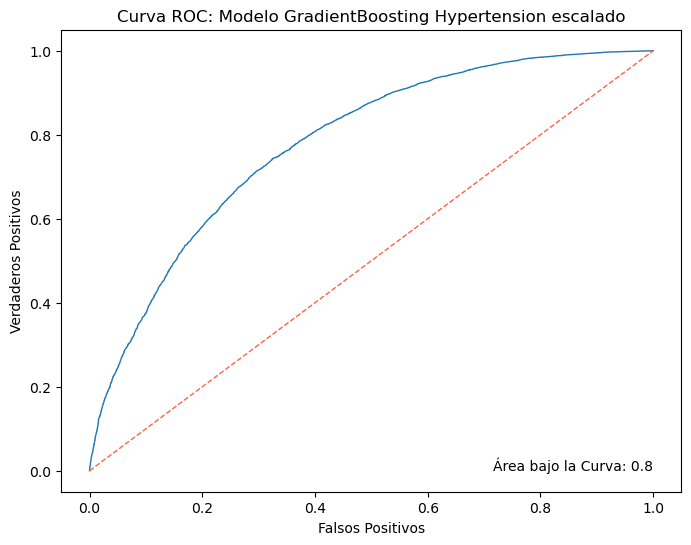

In [42]:
ut.plot_roc_curve(X_test_hypertension_escalado, y_test_hypertension_escalado, modelo_ada_diabetes.best_estimator_,  'Curva ROC: Modelo GradientBoosting Hypertension escalado', 0.80)

**Comentarios:**

Con el gráfico de la Curva ROC podemos observar que cuando estemos capturando el 40% de falsos positivos, nuestro modelo estará capturando aproximadamente un 80% de verdaderos positivos

## **5.7 Serialización**

In [43]:
dump(modelo_gb_hypertension.best_estimator_, 'modelo-hypertension.sav')

['lcj_modelo-hypertension.sav']

___
# <center>***6. Variable Obetivo: Accidente Cerebrovascular***</center>
___

## **6.1 Exploración Variable Objetivo Stroke**

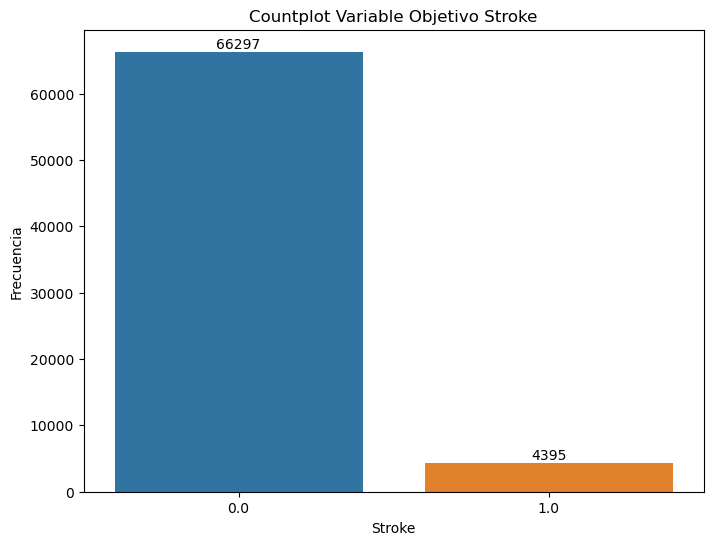

In [44]:
ut.countplot_graph(df, 'Stroke')

##### **```Comentarios:```**
* La variable indicando ataques fulminantes se encuentra muy desbalanceada por lo que la efectividad del modelo se medirá con f1 y recall.

## **6.2 Análisis Variables Independientes con Variable Objetivo Stroke [Crossplot]**

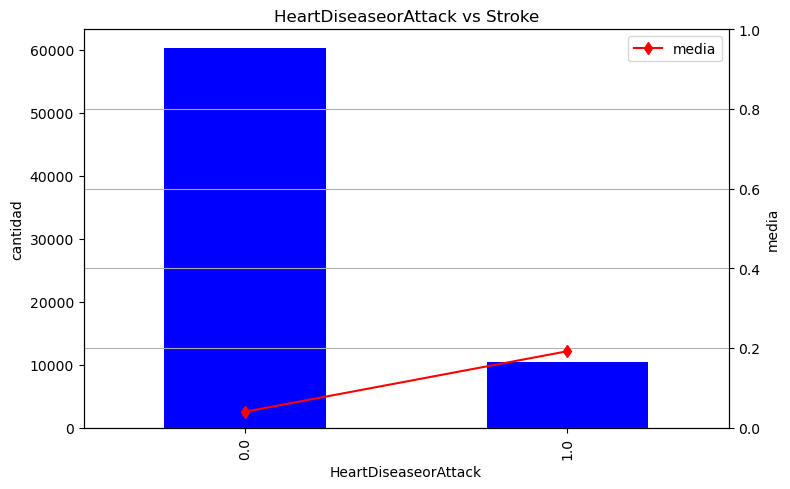

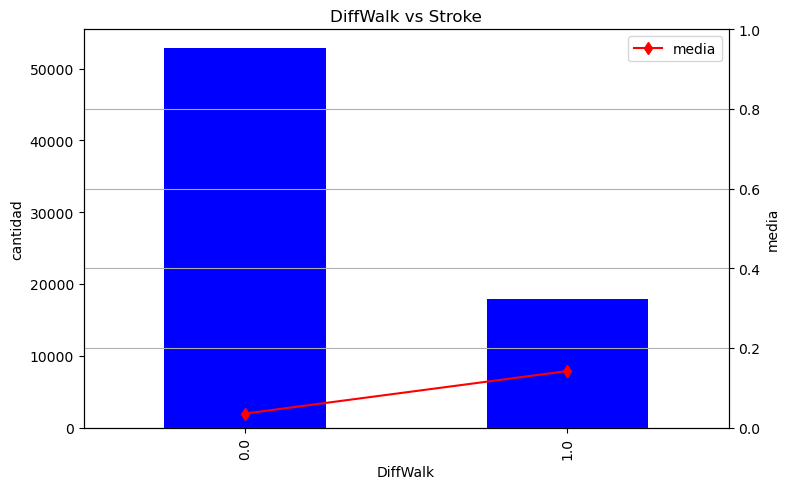

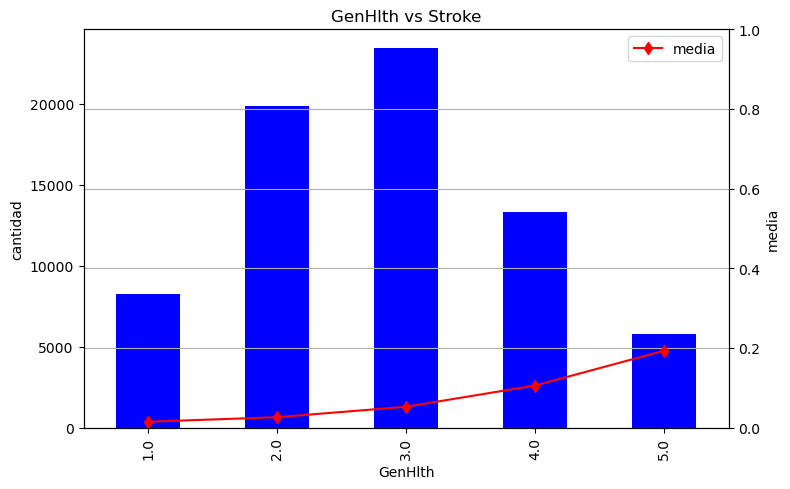

In [45]:
ut.crossplot(df_exp, ['HeartDiseaseorAttack','DiffWalk', 'GenHlth'], 'Stroke', xlim=None)

##### **```Comentarios:```**

**Gráfico Ataque al corazón vs ACV:**

Quienes han presentado paros cardíacos tienen alta probabilidad de tener un ACV, se observa que son la minoría, pero en caso de presentar las dos se pueden presentar complicaciones mayores.

**Gráfico Dificultad para caminar vs ACV:**

Personas sin dificultad de movilidad no presentan riesgo de ACV, lo que no significa que no puedan presentarlo.

**Gráfico Genhtlth vs ACV:**

Se observa que los grupos que se autodeterminan con mala salud, grupo 4 y 5, presentan probabilidad de presentar ACV.

## **6.3 Exploración Econométrica Variable Stroke**

In [46]:
modelo_descriptivo_stroke = ut.model_logit(df, 'Stroke', list_corr_stroke)

Optimization terminated successfully.
         Current function value: 0.197377
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Stroke   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70684
Method:                           MLE   Df Model:                            7
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.1525
Time:                        16:16:18   Log-Likelihood:                -13953.
converged:                       True   LL-Null:                       -16464.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.9645      0.095    -62.628      0.000      -6.151      -5.778

**Comentarios:**

Con la variable objetivo Stroke simularemos un individuo con las siguientes características:

* Cardiopatía coronaria o miocardio: Si.

* Dificultad para caminar: No.

* Salud General: 5(Muy mala).

* Actividad física en los últimos 30 días: Si.

* Hipertensión: No.

* Diabetes: No.

* Edad categoría: 30-34.

In [47]:
intercept = -5.9645
heartda = 1.0281
diffwalk = 0.6090
genh = 0.3022
phys = 0.0101
hypertension = 0.4637
diabetes = 0.2299
age = 0.1292

res = intercept + heartda + genh*5 +  hypertension + diabetes + age*3

print(f'Resultado: {ut.invlogit(res).round(4)*100:.2f}%')

Resultado: 8.75%


**Comentarios:**

Como resultado obtenemos que este individuo, teniendo una enfermedad coronaria o miocardo, con una salud en general mala, que hace deporte, no tiene enfermedades como diabetes o no sufre de hipertensión y con una edad de joven adulto, cuenta con una baja probabilidad de que le ocurra un accidente cerebrovascular.

In [48]:
ut.coef_prob_logit(modelo_descriptivo_stroke.params)

Variable const disminuye en -149.11% aproximadamente la probabilidad de tener diabetes
Variable HeartDiseaseorAttack aumenta en 25.70% aproximadamente la probabilidad de tener diabetes
Variable DiffWalk aumenta en 15.22% aproximadamente la probabilidad de tener diabetes
Variable GenHlth aumenta en 7.56% aproximadamente la probabilidad de tener diabetes
Variable PhysHlth aumenta en 0.25% aproximadamente la probabilidad de tener diabetes
Variable Hypertension aumenta en 11.59% aproximadamente la probabilidad de tener diabetes
Variable Diabetes aumenta en 5.75% aproximadamente la probabilidad de tener diabetes
Variable Age aumenta en 3.23% aproximadamente la probabilidad de tener diabetes


**Comentarios:**

* Las enfermedades coronarias o miocardio estarían afectando mayormente en la probabilidad de que ocurra un accidente cerebrovascular.

* Otras variables que estaríana afectando mayormente la probabilidad serían DiffWalk(Dificultad para caminar) e Hypertension(Hiperstensión).

## **6.4 Entrenamiento de Modelos**

Para el entrenamiento de modelos de la variable objetivo Stroke, buscaremos solo entre dos, los cuales serán Random Forest y Regresión Logística, esto debido al costo computacional. La diferencia con los otros modelos es que la variable objetivo Stroke se encuentra muy desbalanceada, por lo tanto, buscaremos mejorar el balance de clases con los hiperparámetros "class_weight", para lograr esto, mostraremos los resultados sin class_weight y con class_weight.

In [49]:
dict_modelos_stroke_class = {     
    'Random_Forest':(RandomForestClassifier(random_state=random_state, n_jobs=-1), {
        'n_estimators': [200, 300, 350, 400],
        'max_depth':[8, 10, 11, 12],
        'max_features': ['sqrt', None],
        'class_weight': ['balanced', 'balanced_subsample', {0:.94,1:.6}, {0:.6,1:.94}, {0:.5,1:.5}]
    }),   
    'LR': (LogisticRegression(random_state=random_state, n_jobs=-1), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty':['l1', 'l2'],
        'class_weight': [{0:.94,1:.6}, {0:.6,1:.94}, {0:.5,1:.5}, 'balanced']
    }),   
    'Decision_Tree': (DecisionTreeClassifier(random_state=random_state), {
        'criterion': ['gini','entropy','log_loss'],
        'max_depth':[1, 2, 3, 4],
        'max_features':['auto','sqrt','log2'],
        'class_weight': [{0:.94,1:.6}, {0:.6,1:.94}, {0:.5,1:.5}, 'balanced']
    })
}

dict_modelos_stroke = {     
    'Random_Forest':(RandomForestClassifier(random_state=random_state, n_jobs=-1), {
        'n_estimators': [200, 300, 350, 400],
        'max_depth':[8, 10, 11, 12],
        'max_features': ['sqrt', None]
    }),   
    'LR': (LogisticRegression(random_state=random_state, n_jobs=-1), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty':['l1', 'l2']
    }),   
    'Decision_Tree': (DecisionTreeClassifier(random_state=random_state), {
        'criterion': ['gini','entropy','log_loss'],
        'max_depth':[1, 2, 3, 4],
        'max_features':['auto','sqrt','log2']        
    })
}

#### **Modelos sin Class Weight**

In [50]:
metricas_stroke, modelos_stroke, X_test_stroke, y_test_stroke = ut.train_model(df, 'Stroke', list_corr_stroke, dict_modelos_stroke, random_state, scoring='f1_weighted')

#### **Modelos con Class Weight**

In [51]:
metricas_stroke_class, modelos_stroke_class, X_test_stroke_class, y_test_stroke_class = ut.train_model(df, 'Stroke', list_corr_stroke, dict_modelos_stroke_class, random_state, scoring='f1_weighted')

## **6.5 Métricas de Desempeño y Resultados**

#### Modelos sin Class Weight

In [52]:
metricas_stroke.sort_values(by='f1_weighted_validacion', ascending=False)

,best_params,f1_weighted_validacion,f1_weighted_train,auc_score
Random_Forest,"{'max_depth': 12, 'max_features': None, 'n_est...",0.9082,0.9182,0.7657
LR,"{'C': 0.001, 'penalty': 'l2'}",0.9070,0.9081,0.7882
Decision_Tree,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.9070,0.9081,0.6250


#### Modelos con Class Weight

In [53]:
metricas_stroke_class.sort_values(by='f1_weighted_validacion', ascending=False)

,best_params,f1_weighted_validacion,f1_weighted_train,auc_score
LR,"{'C': 1, 'class_weight': {0: 0.6, 1: 0.94}, 'p...",0.9097,0.9112,0.7997
Random_Forest,"{'class_weight': {0: 0.6, 1: 0.94}, 'max_depth...",0.9075,0.9225,0.7636
Decision_Tree,"{'class_weight': {0: 0.94, 1: 0.6}, 'criterion...",0.9070,0.9081,0.6250


Debido a que en los dos casos la Regresión Logistica está cerca de lo óptimo, elegiremos estos dos y los compararemos con classification_report.

In [54]:
X = df.loc[:,list_corr_stroke].drop(columns=['Stroke'])
y = df['Stroke']

# Utilizamos random_state para replicar el mismo X_test utilizado en la función utility.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=.3)

In [55]:
model_lr_stroke = modelos_stroke['LR']
model_lr_stroke_class = modelos_stroke_class['LR']

In [56]:
model_lr_stroke_smote = modelos_stroke_class['LR']

In [57]:
print('----------------[Modelo LR sin Class Weight]---------')
print(classification_report(y_test, model_lr_stroke.predict(X_test)))
print('-----------------------------------------------------')
print('-----------------------------------------------------')
print('----------------[Modelo LR con Class Weight]---------')
print(classification_report(y_test, model_lr_stroke_class.predict(X_test)))

----------------[Modelo LR sin Class Weight]---------
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19879
         1.0       0.00      0.00      0.00      1329

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208

-----------------------------------------------------
-----------------------------------------------------
----------------[Modelo LR con Class Weight]---------
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     19879
         1.0       0.31      0.04      0.07      1329

    accuracy                           0.93     21208
   macro avg       0.63      0.52      0.52     21208
weighted avg       0.90      0.93      0.91     21208



**Comentarios:**

Debido a que el Recall de la Clase 1 sigue siendo muy baja y dada la problemática que tenemos con esta variable objetivo, donde buscamos más la verdad, ya que estamos hablando de accidentes cerebro vasculares, experimentaremos con las probabilidades que predice el modelo para mejorar la métrica y realizaremos un Over sampling.

In [58]:
df_proba = pd.DataFrame(model_lr_stroke_class.predict_proba(X_test))

Predecimos con predict_proba para obtener la probabilidad de la Clase 1 y luego establecemos un corte de probabilidades, donde consideramos que arriba de un 6% corresponde a un caso positivo para ACV y bajo a este que sean casos negativos.

In [59]:
df_proba['prediccion'] = np.where(df_proba[1] > 0.06, 1, 0)

In [60]:
print('------------------------------------------------------')
print('------------------------------------------------------')
print('-----------[Modificando Probabilidad Clase 1]---------')
print(classification_report(y_test, df_proba['prediccion']))

------------------------------------------------------
------------------------------------------------------
-----------[Modificando Probabilidad Clase 1]---------
              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     19879
         1.0       0.12      0.85      0.21      1329

    accuracy                           0.59     21208
   macro avg       0.55      0.71      0.46     21208
weighted avg       0.93      0.59      0.69     21208



Ahora realizamos Over Sampling

In [61]:
oversampler = SMOTE(random_state=12, sampling_strategy='minority')
X_sample, y_sample = oversampler.fit_sample(X_train, y_train)

In [62]:
model_lr_stroke_smote.fit(X_sample, y_sample)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.94, 1: 0.6}, {0: 0.6, 1: 0.94},
                                          {0: 0.5, 1: 0.5}, 'balanced'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1_weighted')

In [63]:
print('------------------------------------------------------')
print('------------------------------------------------------')
print('------------------[Over Sampling]---------------------')
print(classification_report(y_test, model_lr_stroke_class.predict(X_test)))

------------------------------------------------------
------------------------------------------------------
------------------[Over Sampling]---------------------
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     19879
         1.0       0.14      0.73      0.24      1329

    accuracy                           0.71     21208
   macro avg       0.56      0.72      0.53     21208
weighted avg       0.92      0.71      0.79     21208



Elegimos como mejor modelo al LR con Class Weight, pero realizando un balance sintético para obtener mejores métricas, en este caso utilizamos la técnica de Over sampling.

## **6.6 Curva ROC**

In [64]:
auc_score = roc_auc_score(y_test, model_lr_stroke_smote.predict(X_test_stroke_class))

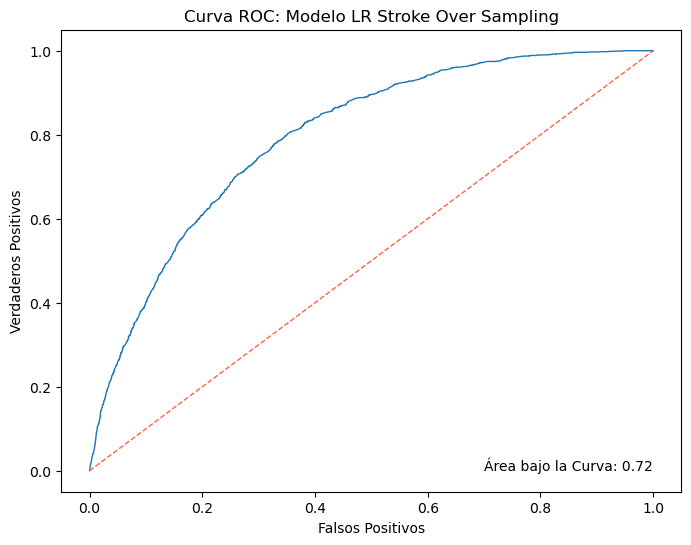

In [65]:
ut.plot_roc_curve(X_test_stroke_class, y_test_stroke_class, model_lr_stroke_smote,  'Curva ROC: Modelo LR Stroke Over Sampling',auc_score.round(2))

**Comentarios:**

Con el gráfico de la Curva ROC podemos observar que cuando estemos capturando el 40% de falsos positivos, nuestro modelo estará capturando aproximadamente un 80% de verdaderos positivos

## **6.6 Serialización**

In [66]:
dump(model_lr_stroke_smote, 'modelo-stroke.sav')

['lcj_modelo-stroke.sav']

---

# <center>***7. Conclusiones***</center>

**Con respecto a la pregunta de investigación** ***¿Qué factores nos ayudan a predecir estas enfermedades?***

Los mayores factores que ayudan al desarrollo de enfermedades tales como diabetes, hipertensión y enfermedades cardiovasculares están relacionadas con el BMI, la edad, la dificultad para caminar y la presencia de alguna de las tres enfermedades como predecentes(Comorbilidad).

**Con respecto a la ***Hipótesis***:**

Con la información que contamos no se puede comprobar de manera fehaciente que el tener un estilo de vida saludable disminuye la probabilidad de tener una de estas enfermedades de manera importante. Sin embargo, hay factores que tienen incidencia como el BMI, que si bien no corresponde a un estilo de vida, si está relacionado con ello, ya que una persona que realiza ejercicio constantemente y come de una manera adecuada, tiene un BMI normal o adecuado, en cambio, una persona sedentaria y que come en exceso, presenta un BMI elevado y, de acuerdo a los datos, una persona con BMI alto, tiene mayor probabilidad de presentar alguna de estas enfermedades.